# feature_engineering_and_data_preparation

# Feature Engineering and Data Preparation

***Missing Values***

Lets see if we have missing values

In [13]:
df.isnull().sum()

Unnamed: 0 0
StartDate 0
EndDate 0
Q4_Area 0
Q4_Area_Other 66
Q5_Year 0
Q5_Year_Other 69
Q6_Gender 0
Q7_Ethnicity 0
Q12_LinkedIn_Connect 0
Q15_LinkedIn_Features 0
Q19_LinkedIn_TaskManage 1
Q19_LinkedIn_TaskIntro 1
Q19_LinkedIn_TaskProf 1
Q19_LinkedIn_TaskIntern 1
Q19_LinkedIn_TaskJob 1
Q19_LinkedIn_TaskInsight 1
Q19_LinkedIn_TaskCompany 1
Q17_LinkedIn_Industry 0
Q17_LinkedIn_Instructors 0
Q17_LinkedIn_Classmates 1
Q17_LinkedIn_Career 0
Q17_LinkedIn_Exposure 1
Q17_LinkedIn_Expression 1
Q17_LinkedIn_Dissemination 1
Q18_LinkedIn_Interact 0
Q18_LinkedIn_Entertained 0
Q18_LinkedIn_Informed 0
Q18_LinkedIn_Career 0
Q18_LinkedIn_Professional 0
Q20_LinkedIn_UseProf 0
Q20_LinkedIn_UseJob 0
Q20_LinkedIn_UseCareer 0
Q20_LinkedIn_UseNetwork 1
Q20_LinkedIn_UseContacts 0
Q20_LinkedIn_UseValue 0
Q22_LinkedIn_FreqYear 0
Q23_LinkedIn_FreqSenior 0
Q24_LinkedIn_FreqCareer 0
Q17_Comments 50
dtype: int64

In [14]:
#We Will drop the columns Unnamed: 0, StartDate, EndDate, Q17_Comments and Q15_LinkedIn_Features as we dont need them for the clustering process
df = df.drop(['Unnamed: 0', 'StartDate', 'EndDate', 'Q17_Comments', 'Q15_LinkedIn_Features', ], axis=1)

In [15]:
#Now lets see the percentage of missing data per feature
(100 * df.isnull().sum() / len(df)).round(2)

Q4_Area 0.00
Q4_Area_Other 90.41
Q5_Year 0.00
Q5_Year_Other 94.52
Q6_Gender 0.00
Q7_Ethnicity 0.00
Q12_LinkedIn_Connect 0.00
Q19_LinkedIn_TaskManage 1.37
Q19_LinkedIn_TaskIntro 1.37
Q19_LinkedIn_TaskProf 1.37
Q19_LinkedIn_TaskIntern 1.37
Q19_LinkedIn_TaskJob 1.37
Q19_LinkedIn_TaskInsight 1.37
Q19_LinkedIn_TaskCompany 1.37
Q17_LinkedIn_Industry 0.00
Q17_LinkedIn_Instructors 0.00
Q17_LinkedIn_Classmates 1.37
Q17_LinkedIn_Career 0.00
Q17_LinkedIn_Exposure 1.37
Q17_LinkedIn_Expression 1.37
Q17_LinkedIn_Dissemination 1.37
Q18_LinkedIn_Interact 0.00
Q18_LinkedIn_Entertained 0.00
Q18_LinkedIn_Informed 0.00
Q18_LinkedIn_Career 0.00
Q18_LinkedIn_Professional 0.00
Q20_LinkedIn_UseProf 0.00
Q20_LinkedIn_UseJob 0.00
Q20_LinkedIn_UseCareer 0.00
Q20_LinkedIn_UseNetwork 1.37
Q20_LinkedIn_UseContacts 0.00
Q20_LinkedIn_UseValue 0.00
Q22_LinkedIn_FreqYear 0.00
Q23_LinkedIn_FreqSenior 0.00
Q24_LinkedIn_FreqCareer 0.00
dtype: float64

In [16]:
#Now lets calculate the percentage of missing values for each features
def percent_missing(dataframe):
    percent_nan = 100 * dataframe.isnull().sum() / len(dataframe)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [17]:
percent_nan = percent_missing(df)

In [18]:
percent_nan

Q19_LinkedIn_TaskIntro 1.369863
Q19_LinkedIn_TaskManage 1.369863
Q19_LinkedIn_TaskIntern 1.369863
Q19_LinkedIn_TaskProf 1.369863
Q19_LinkedIn_TaskJob 1.369863
Q19_LinkedIn_TaskInsight 1.369863
Q17_LinkedIn_Classmates 1.369863
Q19_LinkedIn_TaskCompany 1.369863
Q17_LinkedIn_Dissemination 1.369863
Q20_LinkedIn_UseNetwork 1.369863
Q17_LinkedIn_Exposure 1.369863
Q17_LinkedIn_Expression 1.369863
Q4_Area_Other 90.410959
Q5_Year_Other 94.520548
dtype: float64

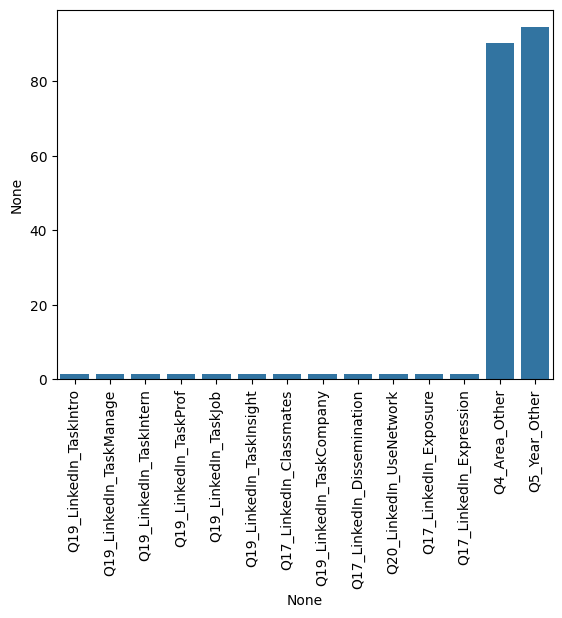

In [19]:
#Now here we got the visualization of the perncentange on missing values per feature
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation = 90);

In [20]:
#Which rows has that little percent (below 1%) to drop them
percent_nan[percent_nan < 1]

#NO ONE

Series([], dtype: float64)

In [21]:
#Lets eliminate the features Q4_Area_Other and Q5_Year_Other due to the high percentage of missing values
df = df.drop(['Q4_Area_Other', 'Q5_Year_Other'], axis=1)

In [22]:
percent_nan = percent_missing(df)

(0.0, 2.0)

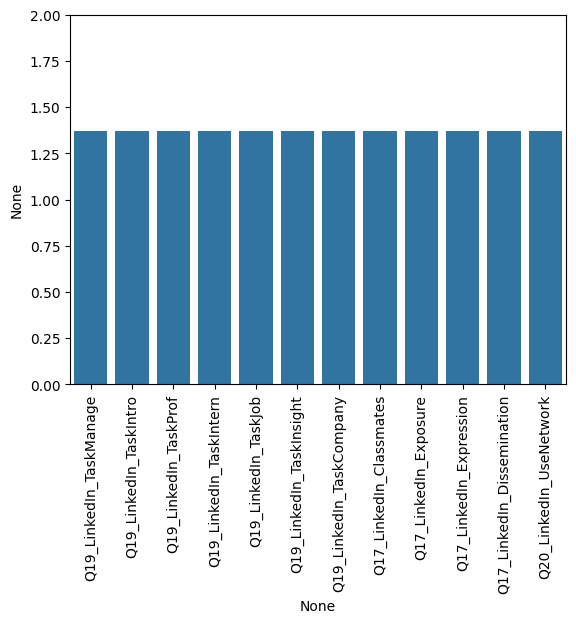

In [23]:
#Now lets see the ones that have a percentage of missing values equal or higer than 1%
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation = 90);
plt.ylim(0,2)

In [24]:
#Now! The rows where missing valuea are present are shown
df[df.isna().any(axis=1)]
#They are just 4 rows

,Q4_Area,Q5_Year,Q6_Gender,Q7_Ethnicity,Q12_LinkedIn_Connect,Q19_LinkedIn_TaskManage,Q19_LinkedIn_TaskIntro,Q19_LinkedIn_TaskProf,Q19_LinkedIn_TaskIntern,Q19_LinkedIn_TaskJob,...,Q18_LinkedIn_Professional,Q20_LinkedIn_UseProf,Q20_LinkedIn_UseJob,Q20_LinkedIn_UseCareer,Q20_LinkedIn_UseNetwork,Q20_LinkedIn_UseContacts,Q20_LinkedIn_UseValue,Q22_LinkedIn_FreqYear,Q23_LinkedIn_FreqSenior,Q24_LinkedIn_FreqCareer
24,Arts & Sciences,Junior,Female,Caucasian,26-50,Very unimportant,Very unimportant,Very unimportant,Very unimportant,Very unimportant,...,Very likely,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,I will use it more often than during this assi...,I will use it more often than during this assi...,I will use it more often than during this assi...
25,Business,Junior,Female,Caucasian,51-100,Very unimportant,Very unimportant,Very unimportant,Very unimportant,Very unimportant,...,Likely,Agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,I will use it about the same amount as during ...,I will use it more often than during this assi...,I will use it more often than during this assi...
32,Business,Freshman,Male,Caucasian,101-500,NaN,NaN,NaN,NaN,NaN,...,Very likely,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,I will use it more often than during this assi...,I will use it more often than during this assi...,I will use it more often than during this assi...
60,Arts & Sciences,Sophomore,Male,Mixed race,101-500,Important,Important,Important,Important,Important,...,Likely,Strongly agree,Strongly agree,Agree,NaN,Agree,Strongly agree,I will use it about the same amount as during ...,I will use it about the same amount as during ...,I will use it more often than during this assi...


In [25]:
#We are going to eliminate them althoug we have a small dataset
df.dropna(inplace=True)

In [26]:
percent_nan = percent_missing(df)

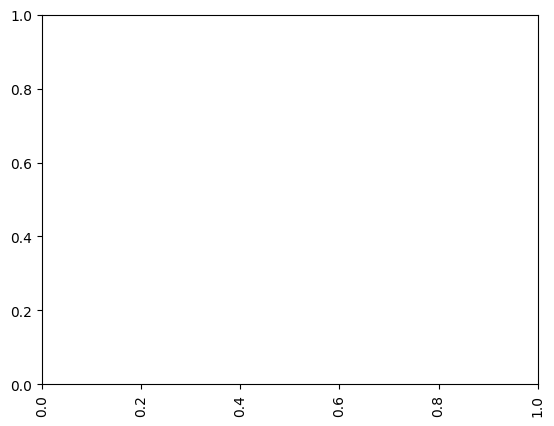

In [27]:
#Now lets see if there is any missing value
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation = 90);
#There's no missing values

In [28]:
df.isnull().sum()

Q4_Area 0
Q5_Year 0
Q6_Gender 0
Q7_Ethnicity 0
Q12_LinkedIn_Connect 0
Q19_LinkedIn_TaskManage 0
Q19_LinkedIn_TaskIntro 0
Q19_LinkedIn_TaskProf 0
Q19_LinkedIn_TaskIntern 0
Q19_LinkedIn_TaskJob 0
Q19_LinkedIn_TaskInsight 0
Q19_LinkedIn_TaskCompany 0
Q17_LinkedIn_Industry 0
Q17_LinkedIn_Instructors 0
Q17_LinkedIn_Classmates 0
Q17_LinkedIn_Career 0
Q17_LinkedIn_Exposure 0
Q17_LinkedIn_Expression 0
Q17_LinkedIn_Dissemination 0
Q18_LinkedIn_Interact 0
Q18_LinkedIn_Entertained 0
Q18_LinkedIn_Informed 0
Q18_LinkedIn_Career 0
Q18_LinkedIn_Professional 0
Q20_LinkedIn_UseProf 0
Q20_LinkedIn_UseJob 0
Q20_LinkedIn_UseCareer 0
Q20_LinkedIn_UseNetwork 0
Q20_LinkedIn_UseContacts 0
Q20_LinkedIn_UseValue 0
Q22_LinkedIn_FreqYear 0
Q23_LinkedIn_FreqSenior 0
Q24_LinkedIn_FreqCareer 0
dtype: int64

# Categorical Features

Since all the features of our dataframe are categorical, we need to convert the classes to numeric for the clustering algorithm, depending whether they are nominal or ordinal

Let’s explore the classes or entries we have in each feature

In [29]:
for c in df.columns:
    # Obtain the unique values for each column avoiding NaN Values
    unique_values = df[c].dropna().unique()

    # Print the name of the column and the classes each has
    print(f"Column: {c[:25]:<25} | Únique: {unique_values}")

Column: Q4_Area                   | Únique: ['Business' 'Arts & Sciences' 'Health Professions' 'Undecided (Exploring)']
Column: Q5_Year                   | Únique: ['Junior' 'Sophomore' 'Senior' 'Freshman']
Column: Q6_Gender                 | Únique: ['Male' 'Female' 'Prefer not to say']
Column: Q7_Ethnicity              | Únique: ['Caucasian' 'Asian American' 'Hispanic/Latino' 'Other' 'Mixed race'
 'African American']
Column: Q12_LinkedIn_Connect      | Únique: ['51-100' '26-50' '101-500' '0-25']
Column: Q19_LinkedIn_TaskManage   | Únique: ['Important' 'Neither important nor unimportant' 'Very important'
 'Very unimportant' 'Unimportant']
Column: Q19_LinkedIn_TaskIntro    | Únique: ['Very important' 'Unimportant' 'Important'
 'Neither important nor unimportant']
Column: Q19_LinkedIn_TaskProf     | Únique: ['Very important' 'Very unimportant' 'Important'
 'Neither important nor unimportant']
Column: Q19_LinkedIn_TaskIntern   | Únique: ['Very important' 'Unimportant' 'Neither important 

In [30]:
#For covinience we convert all the strings in the fuature classes to lowercase
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

In [31]:
#Done
for c in df.columns:
    # Here we get the unique values per feature avoiding missing values
    unique_values = df[c].dropna().unique()

    # Printing the name of the columns in an organized manner
    print(f"Column: {c[:25]:<25} | Únique: {unique_values}")

Column: Q4_Area                   | Únique: ['business' 'arts & sciences' 'health professions' 'undecided (exploring)']
Column: Q5_Year                   | Únique: ['junior' 'sophomore' 'senior' 'freshman']
Column: Q6_Gender                 | Únique: ['male' 'female' 'prefer not to say']
Column: Q7_Ethnicity              | Únique: ['caucasian' 'asian american' 'hispanic/latino' 'other' 'mixed race'
 'african american']
Column: Q12_LinkedIn_Connect      | Únique: ['51-100' '26-50' '101-500' '0-25']
Column: Q19_LinkedIn_TaskManage   | Únique: ['important' 'neither important nor unimportant' 'very important'
 'very unimportant' 'unimportant']
Column: Q19_LinkedIn_TaskIntro    | Únique: ['very important' 'unimportant' 'important'
 'neither important nor unimportant']
Column: Q19_LinkedIn_TaskProf     | Únique: ['very important' 'very unimportant' 'important'
 'neither important nor unimportant']
Column: Q19_LinkedIn_TaskIntern   | Únique: ['very important' 'unimportant' 'neither important 

***Dealing with all the ordinal features***

Using a master dictionary, we can define, map and replace the strings for the ordinal variables according to a scale

In [32]:
pd.set_option('future.no_silent_downcasting', True)
# 1. A Master Map Dictionary
all_scales = {
    # Importance Scale 
    'very unimportant': 1, 'unimportant': 2, 'neither important nor unimportant': 3,
    'important': 4, 'very important': 5,

    # Agreement Scale 
    'strongly disagree': 1, 'disagree': 2, 'neither agree nor disagree': 3,
    'agree': 4, 'strongly agree': 5,

    # Likelihood Scale 
    'very unlikely': 1, 'unlikely': 2, 'neither likely nor unlikely': 3,
    'likely': 4, 'very likely': 5,

    # Usage Frequency Scale
    "i won't use it at all": 1,
    'i will use it less often than during this assignment': 2,
    'i will use it about the same amount as during this assignment': 3,
    'i will use it more often than during this assignment': 4,

    # LinkedIn Connect / Quantity Range
    '0-25': 1,
    '26-50': 2,
    '51-100': 3,
    '101-500': 4
}

# 2. Identify all survey columns 
keywords = 'important|agree|likely|use it|0-25'
survey_cols = [col for col in df.columns if df[col].astype(str).str.contains(keywords, case=False).any()]

# 3. Loop through and apply the combined mapping using .replace()
for col in survey_cols:
    # A. Here we clean the text (lowercase and remove extra spaces)
    df[col] = df[col].astype(str).str.strip().str.lower()

    # B. Filter the master dictionary to only include keys present in this column
    # This prevents mapping unrelated values to NaN
    valid_keys = df[col].unique()
    current_col_map = {k: v for k, v in all_scales.items() if k in valid_keys}

    # C. Use .replace() to substitute text with numbers while keeping unrelated data intact
    if current_col_map:
        df[col] = df[col].replace(current_col_map)

# 4. Convert columns to numeric (handle any remaining 'NaN' strings or other non-numeric data)
for col in survey_cols:
    # 'errors="coerce"' turns anything that can't be a number into an actual Pandas NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [33]:
#Let's see if it worked!
df

,Q4_Area,Q5_Year,Q6_Gender,Q7_Ethnicity,Q12_LinkedIn_Connect,Q19_LinkedIn_TaskManage,Q19_LinkedIn_TaskIntro,Q19_LinkedIn_TaskProf,Q19_LinkedIn_TaskIntern,Q19_LinkedIn_TaskJob,...,Q18_LinkedIn_Professional,Q20_LinkedIn_UseProf,Q20_LinkedIn_UseJob,Q20_LinkedIn_UseCareer,Q20_LinkedIn_UseNetwork,Q20_LinkedIn_UseContacts,Q20_LinkedIn_UseValue,Q22_LinkedIn_FreqYear,Q23_LinkedIn_FreqSenior,Q24_LinkedIn_FreqCareer
0,business,junior,male,caucasian,3,4,5,5,5,4,...,4,4,4,5,2,4,4,2,2,3
1,business,sophomore,female,caucasian,3,3,2,1,2,2,...,5,3,3,4,4,3,4,3,3,3
2,business,junior,female,caucasian,3,5,4,5,5,2,...,4,5,4,4,5,2,4,2,3,2
3,arts & sciences,junior,male,caucasian,2,4,4,4,3,3,...,4,4,4,4,4,4,4,2,3,4
4,business,junior,male,caucasian,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,business,freshman,female,caucasian,3,4,4,5,4,4,...,4,3,3,3,4,4,4,2,3,2
69,health professions,sophomore,female,caucasian,2,4,4,5,4,3,...,4,4,4,4,4,4,5,2,4,4
70,health professions,junior,male,caucasian,3,5,5,4,4,4,...,4,5,4,4,5,4,4,3,3,3
71,arts & sciences,senior,male,caucasian,1,3,2,3,2,5,...,4,3,3,3,4,3,3,3,3,3


*Dealing with the nominal features*

In [34]:
df = pd.get_dummies(df, columns=['Q4_Area', 'Q5_Year', 'Q6_Gender', 'Q7_Ethnicity'], prefix='is')

In [35]:
df.columns

Index(['Q12_LinkedIn_Connect', 'Q19_LinkedIn_TaskManage',
       'Q19_LinkedIn_TaskIntro', 'Q19_LinkedIn_TaskProf',
       'Q19_LinkedIn_TaskIntern', 'Q19_LinkedIn_TaskJob',
       'Q19_LinkedIn_TaskInsight', 'Q19_LinkedIn_TaskCompany',
       'Q17_LinkedIn_Industry', 'Q17_LinkedIn_Instructors',
       'Q17_LinkedIn_Classmates', 'Q17_LinkedIn_Career',
       'Q17_LinkedIn_Exposure', 'Q17_LinkedIn_Expression',
       'Q17_LinkedIn_Dissemination', 'Q18_LinkedIn_Interact',
       'Q18_LinkedIn_Entertained', 'Q18_LinkedIn_Informed',
       'Q18_LinkedIn_Career', 'Q18_LinkedIn_Professional',
       'Q20_LinkedIn_UseProf', 'Q20_LinkedIn_UseJob', 'Q20_LinkedIn_UseCareer',
       'Q20_LinkedIn_UseNetwork', 'Q20_LinkedIn_UseContacts',
       'Q20_LinkedIn_UseValue', 'Q22_LinkedIn_FreqYear',
       'Q23_LinkedIn_FreqSenior', 'Q24_LinkedIn_FreqCareer',
       'is_arts & sciences', 'is_business', 'is_health professions',
       'is_undecided (exploring)', 'is_freshman', 'is_junior', 'is_senior',
 

Our dataframe is ready for the clustering

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 72
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Q12_LinkedIn_Connect        69 non-null     int64
 1   Q19_LinkedIn_TaskManage     69 non-null     int64
 2   Q19_LinkedIn_TaskIntro      69 non-null     int64
 3   Q19_LinkedIn_TaskProf       69 non-null     int64
 4   Q19_LinkedIn_TaskIntern     69 non-null     int64
 5   Q19_LinkedIn_TaskJob        69 non-null     int64
 6   Q19_LinkedIn_TaskInsight    69 non-null     int64
 7   Q19_LinkedIn_TaskCompany    69 non-null     int64
 8   Q17_LinkedIn_Industry       69 non-null     int64
 9   Q17_LinkedIn_Instructors    69 non-null     int64
 10  Q17_LinkedIn_Classmates     69 non-null     int64
 11  Q17_LinkedIn_Career         69 non-null     int64
 12  Q17_LinkedIn_Exposure       69 non-null     int64
 13  Q17_LinkedIn_Expression     69 non-null     int64
 14  Q17_LinkedIn_Diss